In [41]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


In [42]:
# Load the dataset
df = pd.read_csv('cleaned_data.csv', parse_dates=['birthday', 'start_date', 'end_date'])

df


,full_name,pct,birthday,gender,party,senate_class,stage,cycle,start_date,end_date
0,Raphael G. Warnock,51.1,1969-07-23,M,Democrat,3.0,runoff,2022,2022-12-03,2022-12-05
1,Raphael G. Warnock,51.0,1969-07-23,M,Democrat,3.0,runoff,2022,2022-12-01,2022-12-05
2,Raphael G. Warnock,50.5,1969-07-23,M,Democrat,3.0,runoff,2022,2022-12-04,2022-12-04
3,Raphael G. Warnock,50.0,1969-07-23,M,Democrat,3.0,runoff,2022,2022-12-04,2022-12-04
4,Raphael G. Warnock,52.2,1969-07-23,M,Democrat,3.0,runoff,2022,2022-12-04,2022-12-04
...,...,...,...,...,...,...,...,...,...,...
3097,Benjamin L. Cardin,49.4,1943-10-05,M,Democrat,1.0,general,2018,2018-10-01,2018-10-06
3098,Benjamin L. Cardin,56.0,1943-10-05,M,Democrat,1.0,general,2018,2018-09-11,2018-09-16
3099,Thomas R. Carper,61.0,1947-01-23,M,Democrat,1.0,general,2018,2018-09-11,2018-09-17
3100,Thomas R. Carper,60.0,1947-01-23,M,Democrat,1.0,general,2018,2018-09-11,2018-09-17


In [43]:
df

,full_name,pct,birthday,gender,party,senate_class,stage,cycle,start_date,end_date
0,Raphael G. Warnock,51.1,1969-07-23,M,Democrat,3.0,runoff,2022,2022-12-03,2022-12-05
1,Raphael G. Warnock,51.0,1969-07-23,M,Democrat,3.0,runoff,2022,2022-12-01,2022-12-05
2,Raphael G. Warnock,50.5,1969-07-23,M,Democrat,3.0,runoff,2022,2022-12-04,2022-12-04
3,Raphael G. Warnock,50.0,1969-07-23,M,Democrat,3.0,runoff,2022,2022-12-04,2022-12-04
4,Raphael G. Warnock,52.2,1969-07-23,M,Democrat,3.0,runoff,2022,2022-12-04,2022-12-04
...,...,...,...,...,...,...,...,...,...,...
3097,Benjamin L. Cardin,49.4,1943-10-05,M,Democrat,1.0,general,2018,2018-10-01,2018-10-06
3098,Benjamin L. Cardin,56.0,1943-10-05,M,Democrat,1.0,general,2018,2018-09-11,2018-09-16
3099,Thomas R. Carper,61.0,1947-01-23,M,Democrat,1.0,general,2018,2018-09-11,2018-09-17
3100,Thomas R. Carper,60.0,1947-01-23,M,Democrat,1.0,general,2018,2018-09-11,2018-09-17


In [44]:
# Calculate age from birthday
df['age'] = df['birthday'].apply(lambda x : (pd.datetime.now().year - x.year))


/var/folders/q8/cqxy7x3940gflrm67pjkrzj00000gn/T/ipykernel_71069/2765120112.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['age'] = df['birthday'].apply(lambda x : (pd.datetime.now().year - x.year))


<AxesSubplot:>

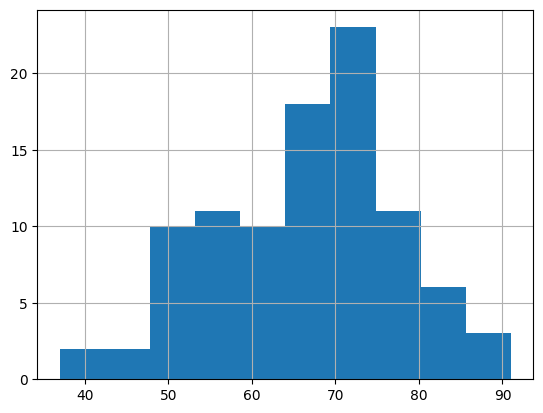

In [23]:
# Plot histogram of maximum age by full_name
df.groupby('full_name')['age'].max().hist()

In [78]:
# read csv file
df2 = pd.read_csv('sen_info2_summary.csv')





In [79]:
df2

,Unnamed: 0,Senator,Age,Gender,Emotion (Majority),Race (Majority),Valence_m,Normalized_Valence_m,Weighted_Valence_m
0,0,John Fetterman,34.666666666666664,"[{'Woman': 0.0004268953034625156, 'Man': 99.99...",sad,middle eastern,-97.255810,-0.553504,-38.817667
1,1,John Barrasso,"[34, 50, 23, 47, 31, 25]","[{'Woman': 0.0037602225347654894, 'Man': 99.99...",fear,white,-5.993241,44.934780,6.692544
2,2,Patrick J. Leahy,"[39, 56, 44, 55, 37, 46, 45]","[{'Woman': 0.24125000927597284, 'Man': 99.7587...",sad,white,-17.542629,32.962189,-0.322584
3,3,Edward J. Markey,"[66, 55, 54, 38, 32, 46, 49]","[{'Woman': 0.1553345355205238, 'Man': 99.84466...",happy,white,30.144511,61.149415,24.350324
4,4,Susan M. Collins,"[51, 50, 39, 46, 58, 49, 49]","[{'Woman': 0.8582871407270432, 'Man': 99.14171...",happy,white,4.225552,49.673771,11.716790
...,...,...,...,...,...,...,...,...,...
92,92,Michael F. Bennet,"[29, 27, 29, 26, 25]","[{'Woman': 0.07259837002493441, 'Man': 99.9274...",happy,white,66.373953,77.529050,42.077927
93,93,Roger F. Wicker,"[37, 48, 49, 54, 35]","[{'Woman': 0.0362851977115497, 'Man': 99.96371...",happy,white,26.615844,57.988650,22.307447
94,94,Ted Cruz,"[30, 30, 24, 45, 36, 29]","[{'Woman': 0.024485302856191993, 'Man': 99.975...",happy,white,-21.815346,30.655422,-2.489053
95,95,Cynthia M. Lummis,"[32, 35, 39, 36, 44]","[{'Woman': 99.99955892562866, 'Man': 0.0004365...",happy,white,99.205422,99.222004,59.526603


In [80]:
import pandas as pd


# Preprocess names for consistency
df['full_name'] = df['full_name'].str.strip().str.lower()
df2['Senator'] = df2['Senator'].str.strip().str.lower()

# Sort DataFrames based on the name column
df.sort_values(by='full_name', inplace=True)
df2.sort_values(by='Senator', inplace=True)

# Merge the DataFrames on the 'Senator' column
merged_df = pd.merge(df, df2, left_on='full_name', right_on='Senator')

# Drop the 'Senator' column as it's redundant with 'full_name'
merged_df.drop('Senator', axis=1, inplace=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged.csv', index=False)


In [81]:
df.shape, df2.shape, merged_df.shape

((3102, 11), (97, 9), (3102, 19))

In [82]:
# merged data to csv
merged_df.to_csv('merged2.csv', index=False)

In [83]:
unique_names_df = merged_df.drop_duplicates(subset='full_name')

In [84]:
# remove index column
unique_names_df.reset_index(drop=True, inplace=True)

In [74]:
# to csv 
unique_names_df.to_csv('senators_info.csv', index=False)

In [85]:
unique_names_df.shape

(96, 19)

In [6]:
# Display the count of each top_emotion
df['top_emotion'].value_counts()

engagement       297
esteem           290
disconnection    287
confidence       284
pleasure         284
affection        283
anticipation     279
excitement       277
sympathy         275
happiness        275
peace            271
Name: top_emotion, dtype: int64

In [86]:
unique_names_df

,full_name,pct,birthday,gender,party,senate_class,stage,cycle,start_date,end_date,age,Unnamed: 0,Age,Gender,Emotion (Majority),Race (Majority),Valence_m,Normalized_Valence_m,Weighted_Valence_m
0,amy klobuchar,54.0,1960-05-25,F,Democrat,1.0,general,2018,2018-10-15,2018-10-30,64,18,"[36, 38, 32, 24, 42, 36, 36]","[{'Woman': 15.813137590885162, 'Man': 84.18686...",happy,white,46.458843,70.451677,32.722343
1,ben ray luján,52.0,1972-06-07,M,Democrat,2.0,general,2020,2020-10-23,2020-10-29,52,61,[],[],NaN,NaN,NaN,NaN,NaN
2,benjamin l. cardin,56.0,1943-10-05,M,Democrat,1.0,general,2018,2018-09-11,2018-09-16,81,25,"[56, 61, 50, 41, 32, 39, 54, 51]","[{'Woman': 0.18583001801744103, 'Man': 99.8141...",happy,asian,13.631545,50.211414,15.568800
3,bernard sanders,60.0,1941-09-08,M,Independent,1.0,general,2018,2018-10-05,2018-10-14,83,10,"[49, 27, 39, 54, 35, 38, 39, 58]","[{'Woman': 0.030981877353042364, 'Man': 99.969...",fear,white,-28.026728,33.006669,-4.486058
4,bill cassidy,42.0,1957-09-28,M,Republican,2.0,jungle primary,2020,2020-08-06,2020-08-12,67,46,"[35, 51, 53, 44, 33, 30]","[{'Woman': 0.006983892671996728, 'Man': 99.993...",neutral,white,-0.896708,34.612152,6.635482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,tim scott,57.0,1965-09-19,M,Republican,3.0,general,2022,2022-03-08,2022-03-13,59,69,"[28, 29, 31, 32, 33]","[{'Woman': 0.11554361553862691, 'Man': 99.8844...",happy,black,45.940731,60.433072,30.492184
92,tina smith,49.0,1958-03-04,F,Democrat,2.0,general,2020,2020-09-03,2020-09-04,66,36,"[37, 45, 42, 43, 53]","[{'Woman': 99.99665021896362, 'Man': 0.0033439...",happy,white,98.841167,99.336834,59.404835
93,todd young,45.0,1972-08-24,M,Republican,3.0,general,2022,2022-08-20,2022-08-24,52,14,"[28, 42, 35, 46, 38, 40, 42, 45]","[{'Woman': 37.56598234176636, 'Man': 62.434017...",happy,white,32.031845,58.070958,24.479534
94,tom cotton,62.5,1977-05-13,M,Republican,2.0,general,2020,2020-10-11,2020-10-13,47,22,"[29, 25, 34, 35, 33, 30, 34]","[{'Woman': 0.008276743756141514, 'Man': 99.991...",happy,white,20.154085,57.736826,19.684924


In [96]:
## Final Feature Selection

target = ['pct'] # Define target, date-related, categorical, and numeric features for final feature selection
date_features = ['start_date', 'end_date'] # Is cycle really "date" or categorical?
categorical_features = ['Emotion (Majority)', 'gender', 'party', 'senate_class', 'stage'] # Categorical features
numeric_features = ['age','Valence_m','Normalized_Valence_m','Weighted_Valence_m']  # Numeric features


In [93]:
### Train/Test Split"""

train, test = train_test_split(unique_names_df, test_size=0.2)

X_train = train.drop(columns=target)
y_train = train[target]

X_test = test.drop(columns=target)
y_test = test[target]

In [94]:
# Normalize Numeric Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [97]:
# Encode Categorical Features"""
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

In [98]:
X_train[numeric_features]

,age,Valence_m,Normalized_Valence_m,Weighted_Valence_m
78,0.302991,-0.615396,-0.629521,-0.622215
12,-1.012855,-1.761422,-1.419096,-1.696704
17,-0.166954,-1.112356,-1.387797,-1.179682
88,-1.200833,1.277224,1.152659,1.257511
69,1.054902,-1.122576,-1.237160,-1.154562
...,...,...,...,...
93,-1.294822,0.506938,0.436100,0.494405
90,1.054902,-0.333956,-0.401285,-0.350788
23,-1.576789,0.900832,1.039264,0.936729
13,-1.482800,-0.457410,-1.022389,-0.584507


In [99]:
#Supervised Modeling
### Tree Methods
# Decision Tree (and Random Forest for ensembles week)
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X_train[numeric_features], y_train, cv=10)

array([-1.23336368e-03, -1.26934327e+00,  8.27898104e-02,  5.17542889e-02,
       -5.62823939e-01, -4.14128878e-02, -6.69994890e-02, -9.73608551e-02,
       -6.43740059e-03, -4.77562978e-01])

In [102]:
# KNN Regressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train[numeric_features], y_train)

KNeighborsRegressor(n_neighbors=2)

In [101]:
# ValueError: Input X contains NaN.
# replace NaN with 0
X_train.fillna(0, inplace=True)

In [104]:
# Predict using KNN for a given data point
print(neigh.predict([[50,3.0,2.0,1.0]])) 

[[33.5]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# Unsupervised Modeling

In [105]:
#KMeans and Hierarchical Clustering


X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [106]:
# Hierarchical Clustering
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering().fit(X)
clustering.labels_

array([1, 1, 1, 0, 0, 0])

# Conclusion
## In our analysis, we explored the predictability of U.S. Senators' Job Approval Ratings (JAR) utilizing a curated "Persona Profile" integrating demographic information, party affiliation, professional roles, and Emotion scores derived from photographic data. Through clustering techniques, we investigated logical groupings based on emotional characteristics, probing potential associations with party lines, gender, and age. Additionally, we examined the impact of major historical events on Senators' JARs, focusing on a specific significant event to discern its influence. Furthermore, we assessed the effect of Senate composition, particularly the majority party, on Senators' JARs by analyzing a specific time period, offering valuable insights into political dynamics and public perception. Our findings suggest that Senators' JARs are influenced by a combination of factors, including emotional characteristics, party affiliation, and historical events, underscoring the complexity of public opinion and the importance of understanding these dynamics in political analysis.

In [107]:
# validate all models
from sklearn.metrics import mean_squared_error
y_pred = neigh.predict(X_test[numeric_features])
mean_squared_error(y_test, y_pred)

#y_pred = regressor.predict(X_test[numeric_features])
#mean_squared_error(y_test, y_pred)

# KMeans
kmeans.predict(X_test[numeric_features])
kmeans.cluster_centers_

# Hierarchical Clustering
clustering.labels_
clustering.fit_predict(X_test[numeric_features])


# Unsupervised Modeling
# KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train[numeric_features])
kmeans.labels_
kmeans.predict(X_test[numeric_features])
kmeans.cluster_centers_

# Hierarchical Clustering
clustering = AgglomerativeClustering().fit(X_train[numeric_features])
clustering.labels_
clustering.fit_predict(X_test[numeric_features])


#print all score results
print("Decision Tree: ", cross_val_score(regressor, X_train[numeric_features], y_train, cv=10))
print("KNN: ", mean_squared_error(y_test, y_pred))
print("KMeans: ", kmeans.predict(X_test[numeric_features]))
print("Hierarchical Clustering: ", clustering.fit_predict(X_test[numeric_features]))




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


ValueError: X has 4 features, but KMeans is expecting 2 features as input.